# Olap Queries Analysis

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from IPython.display import display

#### Connection To DAtabase from part 2

In [4]:
conn = sqlite3.connect('../2_ETL_Process/retail_dw.db')

# Query 1: Roll-up
- Objective: Aggregate total sales by country and then by quarter to see high-level performance.
- This query rolls up sales from individual transactions to the country-quarter level.

In [5]:
queryRollup = """
SELECT
    c.Country,
    t.Year,
    t.Quarter,
    SUM(fs.TotalSales) AS TotalSalesAmount
FROM
    FactSales fs
JOIN
    DimCustomer c ON fs.CustomerID = c.CustomerID
JOIN
    DimTime t ON fs.TimeID = t.TimeID
GROUP BY
    c.Country, t.Year, t.Quarter
ORDER BY
    c.Country, t.Year, t.Quarter;
"""
rollup_df = pd.read_sql_query(queryRollup, conn)
print("Roll-up: Total sales by country and quarter")
display(rollup_df)


Roll-up: Total sales by country and quarter


,Country,Year,Quarter,TotalSalesAmount
0,Australia,2010,4,415.700
1,Australia,2011,1,41307.220
2,Australia,2011,2,39128.240
3,Australia,2011,3,30185.670
4,Australia,2011,4,24168.430
...,...,...,...,...
126,United Kingdom,2011,2,1415857.231
127,United Kingdom,2011,3,1703001.743
128,United Kingdom,2011,4,2137450.520
129,Unspecified,2011,2,1287.460


# Query 2 : Drill-down
- Sales Details for UK by month

In [6]:
queryDrilldown = """
SELECT 
    t.Month,
    t.Year,
    p.Category,
    SUM(f.Quantity) as TotalQuantity,
    SUM(f.TotalSales) as TotalSales
FROM FactSales f
JOIN DimCustomer c ON f.CustomerID = c.CustomerID
JOIN DimTime t ON f.TimeID = t.TimeID
JOIN DimProduct p ON f.ProductID = p.ProductID
WHERE c.Country = 'United Kingdom'
GROUP BY t.Year, t.Month, p.Category
ORDER BY t.Year, t.Month, p.Category;
"""
drilldown_df = pd.read_sql_query(queryDrilldown, conn)
print("\nDrill-down: UK sales by month and category")
display(drilldown_df)


Drill-down: UK sales by month and category


,Month,Year,Category,TotalQuantity,TotalSales
0,12,2010,Decor,11099,21957.10
1,12,2010,Kits,11315,30159.58
2,12,2010,Other,88923,141819.05
3,12,2010,Party Supplies,10468,18264.98
4,12,2010,Storage,13387,23788.00
...,...,...,...,...,...
60,12,2011,Decor,11161,20399.56
61,12,2011,Kits,19810,38151.98
62,12,2011,Other,185485,339590.16
63,12,2011,Party Supplies,6733,9616.73


# Query 3: Slice
- Objective: Isolate sales data for a specific product category ('Decor') to analyze its performance.
- This query slices the data cube to show only the 'Decor' category.

In [7]:
querySlice = """
SELECT 
    c.Country,
    SUM(f.TotalSales) as TotalSales
FROM FactSales f
JOIN DimCustomer c ON f.CustomerID = c.CustomerID
JOIN DimProduct p ON f.ProductID = p.ProductID
WHERE p.Category = 'Decor'
GROUP BY c.Country
ORDER BY TotalSales DESC;
"""
slice_df = pd.read_sql_query(querySlice, conn)
print("\nSlice: Total sales for Decor category by country")
display(slice_df)



Slice: Total sales for Decor category by country


,Country,TotalSales
0,United Kingdom,415478.56
1,Netherlands,18438.22
2,France,11894.83
3,EIRE,9828.49
4,Japan,6624.96
5,Australia,6356.66
6,Germany,5008.80
7,Spain,1525.65
8,Switzerland,1454.57
9,Belgium,1223.03


# Visualizing Query Result
### Bar chart of sales by country

<Figure size 1200x600 with 0 Axes>

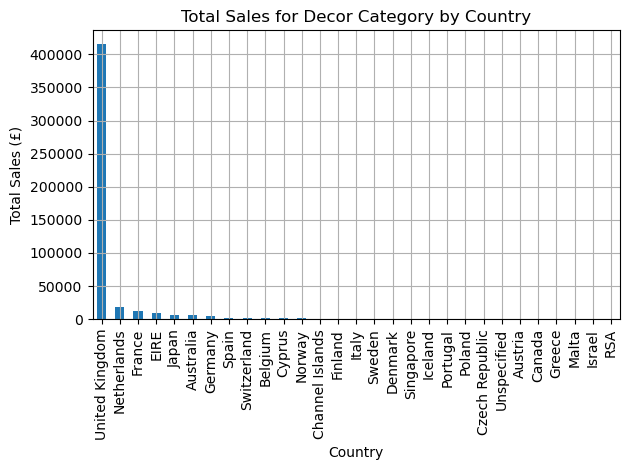

In [15]:
plt.figure(figsize=(12, 6))
slice_df.plot(kind='bar', x='Country', y='TotalSales', legend=False)
plt.title('Total Sales for Decor Category by Country')
plt.ylabel('Total Sales (£)')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()
plt.savefig('decor_sales_by_country.png')
plt.show()

### closing the connection

In [17]:
conn.close()